### Esercitazione 6 - Bande di Bollinger
#### Argomenti

* analisi e costruzione delle bande di Bollinger
* backtesting di due (semplici) strategie

Le bande di Bollinger sono inviluppi tracciati a un certo livello di deviazione standard al di sopra e
al di sotto di una semplice media mobile del prezzo. Poiché la distanza delle bande si basa sulla
deviazione standard, si adattano alle oscillazioni di volatilità del prezzo sottostante.

Le bande di Bollinger utilizzano 2 parametri, Periodo e Deviazioni standard. I valori predefiniti sono
20 per il periodo e 2 per le deviazioni standard, sebbene sia possibile personalizzare le combinazioni.

Le bande di Bollinger aiutano a determinare se i prezzi sono alti o bassi su base relativa.
La coppia di bande (superiore e inferiore) non è pensata per essere utilizzata da sola ma per confermare
i segnali forniti da altri indicatori.
Spesso sono comunque usate come dei supporti e resistenze dinamici.

In [1]:
import pandas as pd
import MetaTrader5 as mt5
import mplfinance as mpf

In [2]:
connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H1, 0, 500))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

candles.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2022-09-16 21:00:00,1.00022,1.00140,1.00020,1.00124,3905,5,0
2022-09-16 22:00:00,1.00123,1.00148,1.00077,1.00139,1705,5,0
2022-09-18 23:00:00,1.00084,1.00152,1.00062,1.00135,605,8,0
2022-09-19 00:00:00,1.00115,1.00226,1.00047,1.00201,2061,5,0
2022-09-19 01:00:00,1.00204,1.00285,1.00163,1.00218,2289,5,0


In [3]:
def get_bbands(candles, window=14):
    candles = candles.copy()
    candles['mean'] = candles['close'].rolling(window=window).mean()
    candles['std'] = candles['close'].rolling(window=window).std()
    candles['bb_upper'] = candles['mean'] + candles['std'] * 2
    candles['bb_lower'] = candles['mean'] - candles['std'] * 2
    return candles

window = 7
candles = get_bbands(candles, window=window)

candles.head(10)

,open,high,low,close,tick_volume,spread,real_volume,mean,std,bb_upper,bb_lower
time,,,,,,,,,,,
2022-09-16 21:00:00,1.00022,1.00140,1.00020,1.00124,3905,5,0,NaN,NaN,NaN,NaN
2022-09-16 22:00:00,1.00123,1.00148,1.00077,1.00139,1705,5,0,NaN,NaN,NaN,NaN
2022-09-18 23:00:00,1.00084,1.00152,1.00062,1.00135,605,8,0,NaN,NaN,NaN,NaN
2022-09-19 00:00:00,1.00115,1.00226,1.00047,1.00201,2061,5,0,NaN,NaN,NaN,NaN
2022-09-19 01:00:00,1.00204,1.00285,1.00163,1.00218,2289,5,0,NaN,NaN,NaN,NaN
2022-09-19 02:00:00,1.00230,1.00290,1.00092,1.00107,2813,5,0,NaN,NaN,NaN,NaN
2022-09-19 03:00:00,1.00105,1.00126,1.00057,1.00076,1914,5,0,1.001429,0.000504,1.002436,1.000421
2022-09-19 04:00:00,1.00077,1.00077,0.99941,1.00027,2188,5,0,1.001290,0.000670,1.002630,0.999950
2022-09-19 05:00:00,1.00025,1.00032,0.99942,0.99976,1422,5,0,1.001057,0.000880,1.002817,0.999297


In [4]:
candles = candles[window:]

candles.head()

,open,high,low,close,tick_volume,spread,real_volume,mean,std,bb_upper,bb_lower
time,,,,,,,,,,,
2022-09-19 04:00:00,1.00077,1.00077,0.99941,1.00027,2188,5,0,1.001290,0.000670,1.002630,0.999950
2022-09-19 05:00:00,1.00025,1.00032,0.99942,0.99976,1422,5,0,1.001057,0.000880,1.002817,0.999297
2022-09-19 06:00:00,0.99976,0.99993,0.99902,0.99918,1277,5,0,1.000747,0.001111,1.002970,0.998524
2022-09-19 07:00:00,0.99917,0.99933,0.99756,0.99807,2692,5,0,1.000184,0.001339,1.002863,0.997505
2022-09-19 08:00:00,0.99807,0.99866,0.99680,0.99703,4182,5,0,0.999449,0.001469,1.002386,0.996511


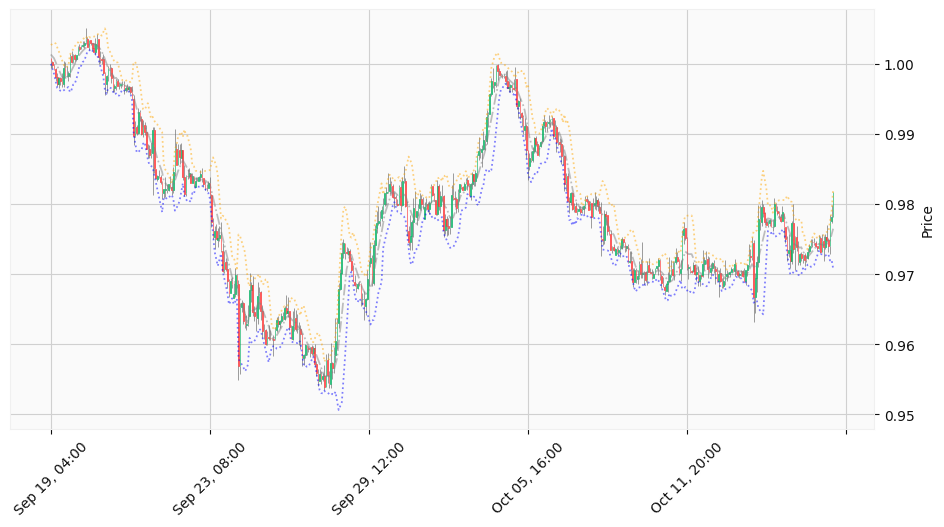

In [5]:
def plot_bbands(candles):
    bb_upper_plot = mpf.make_addplot(candles['bb_upper'], linestyle='dotted', alpha=0.5, color='orange')
    bb_lower_plot = mpf.make_addplot(candles['bb_lower'], linestyle='dotted', alpha=0.5, color='blue')
    mean_plot = mpf.make_addplot(candles['mean'], linestyle='dashdot', alpha=0.5, color='gray')
    mpf.plot(candles, addplot=[bb_upper_plot, bb_lower_plot, mean_plot], type='candle', style='yahoo', figsize=(12, 6))

plot_bbands(candles)

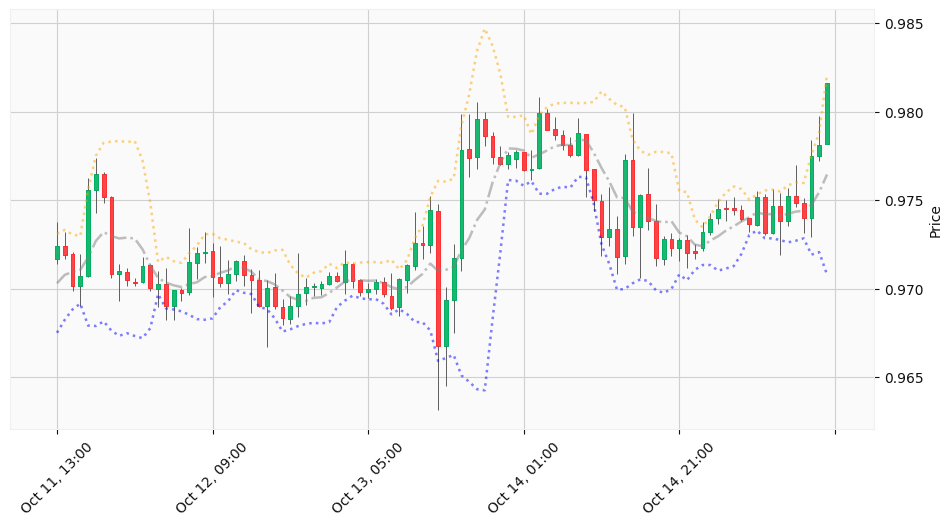

In [6]:
plot_bbands(candles[-100:])

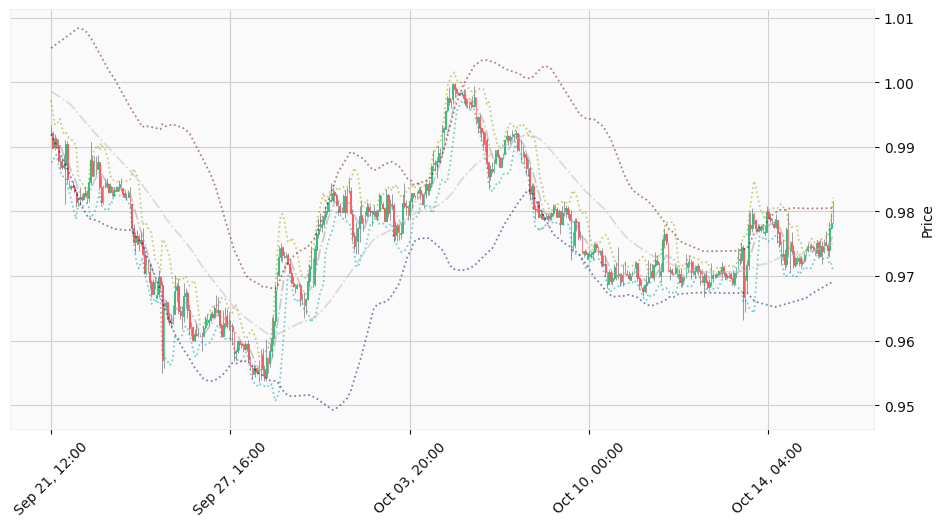

In [7]:
def plot_two_bbands(candles_fast, candles_slow):
    bb_upper_plot_fast = mpf.make_addplot(candles_fast['bb_upper'], linestyle='dotted', alpha=0.5, color='#999900')
    bb_lower_plot_fast = mpf.make_addplot(candles_fast['bb_lower'], linestyle='dotted', alpha=0.5, color='#009999')
    mean_plot_fast = mpf.make_addplot(candles_fast['mean'], linestyle='dashdot', alpha=0.5, color='#999999')
    bb_upper_plot_slow = mpf.make_addplot(candles_slow['bb_upper'], linestyle='dotted', alpha=0.5, color='#660000')
    bb_lower_plot_slow = mpf.make_addplot(candles_slow['bb_lower'], linestyle='dotted', alpha=0.5, color='#000066')
    mean_plot_slow = mpf.make_addplot(candles_slow['mean'], linestyle='dashdot', alpha=0.5, color='#BBBBBB')
    mpf.plot(candles_fast, addplot=[
        bb_upper_plot_fast, bb_lower_plot_fast, mean_plot_fast,
        bb_upper_plot_slow, bb_lower_plot_slow, mean_plot_slow,
    ], type='candle', style='yahoo', figsize=(12, 6))

window_fast = 7
window_slow = 56
candles_bb_fast = get_bbands(candles, window=window_fast)
candles_bb_fast = candles_bb_fast[window_slow:]
candles_bb_slow = get_bbands(candles, window=window_slow)
candles_bb_slow = candles_bb_slow[window_slow:]

plot_two_bbands(candles_bb_fast, candles_bb_slow)

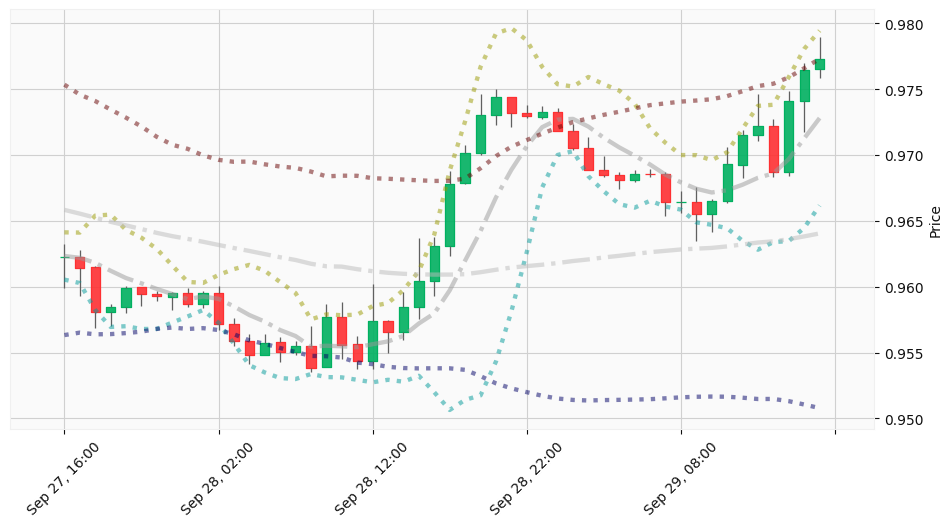

In [8]:
plot_two_bbands(candles_bb_fast[100:150], candles_bb_slow[100:150])

2022-09-21 08:00:00 sell: 0.98972  --  2022-09-22 14:00:00 buy: 0.98765  ->  0.0020700000000000163
2022-09-23 09:00:00 sell: 0.97747  --  2022-09-27 07:00:00 buy: 0.9651  ->  0.012369999999999992
2022-09-27 18:00:00 sell: 0.95809  --  2022-09-28 15:00:00 buy: 0.96045  ->  -0.0023600000000000287
2022-09-28 17:00:00 buy: 0.96783  --  2022-09-30 13:00:00 sell: 0.97461  ->  0.006780000000000008
2022-10-04 08:00:00 buy: 0.98701  --  2022-10-05 12:00:00 sell: 0.99238  ->  0.005369999999999986
2022-10-06 15:00:00 sell: 0.9829  --  2022-10-11 12:00:00 buy: 0.97171  ->  0.011190000000000033
2022-10-11 17:00:00 buy: 0.97557  --  2022-10-11 22:00:00 sell: 0.97048  ->  -0.005090000000000039
2022-10-13 11:00:00 buy: 0.97257  --  2022-10-13 14:00:00 sell: 0.96677  ->  -0.005800000000000027
2022-10-13 17:00:00 buy: 0.97786  --  2022-10-14 11:00:00 sell: 0.97295  ->  -0.00490999999999997
2022-10-17 16:00:00 buy: 0.98163  --  2022-10-18 11:00:00 sell: 0.98347  ->  0.0018399999999999528

wallet: 0.02145

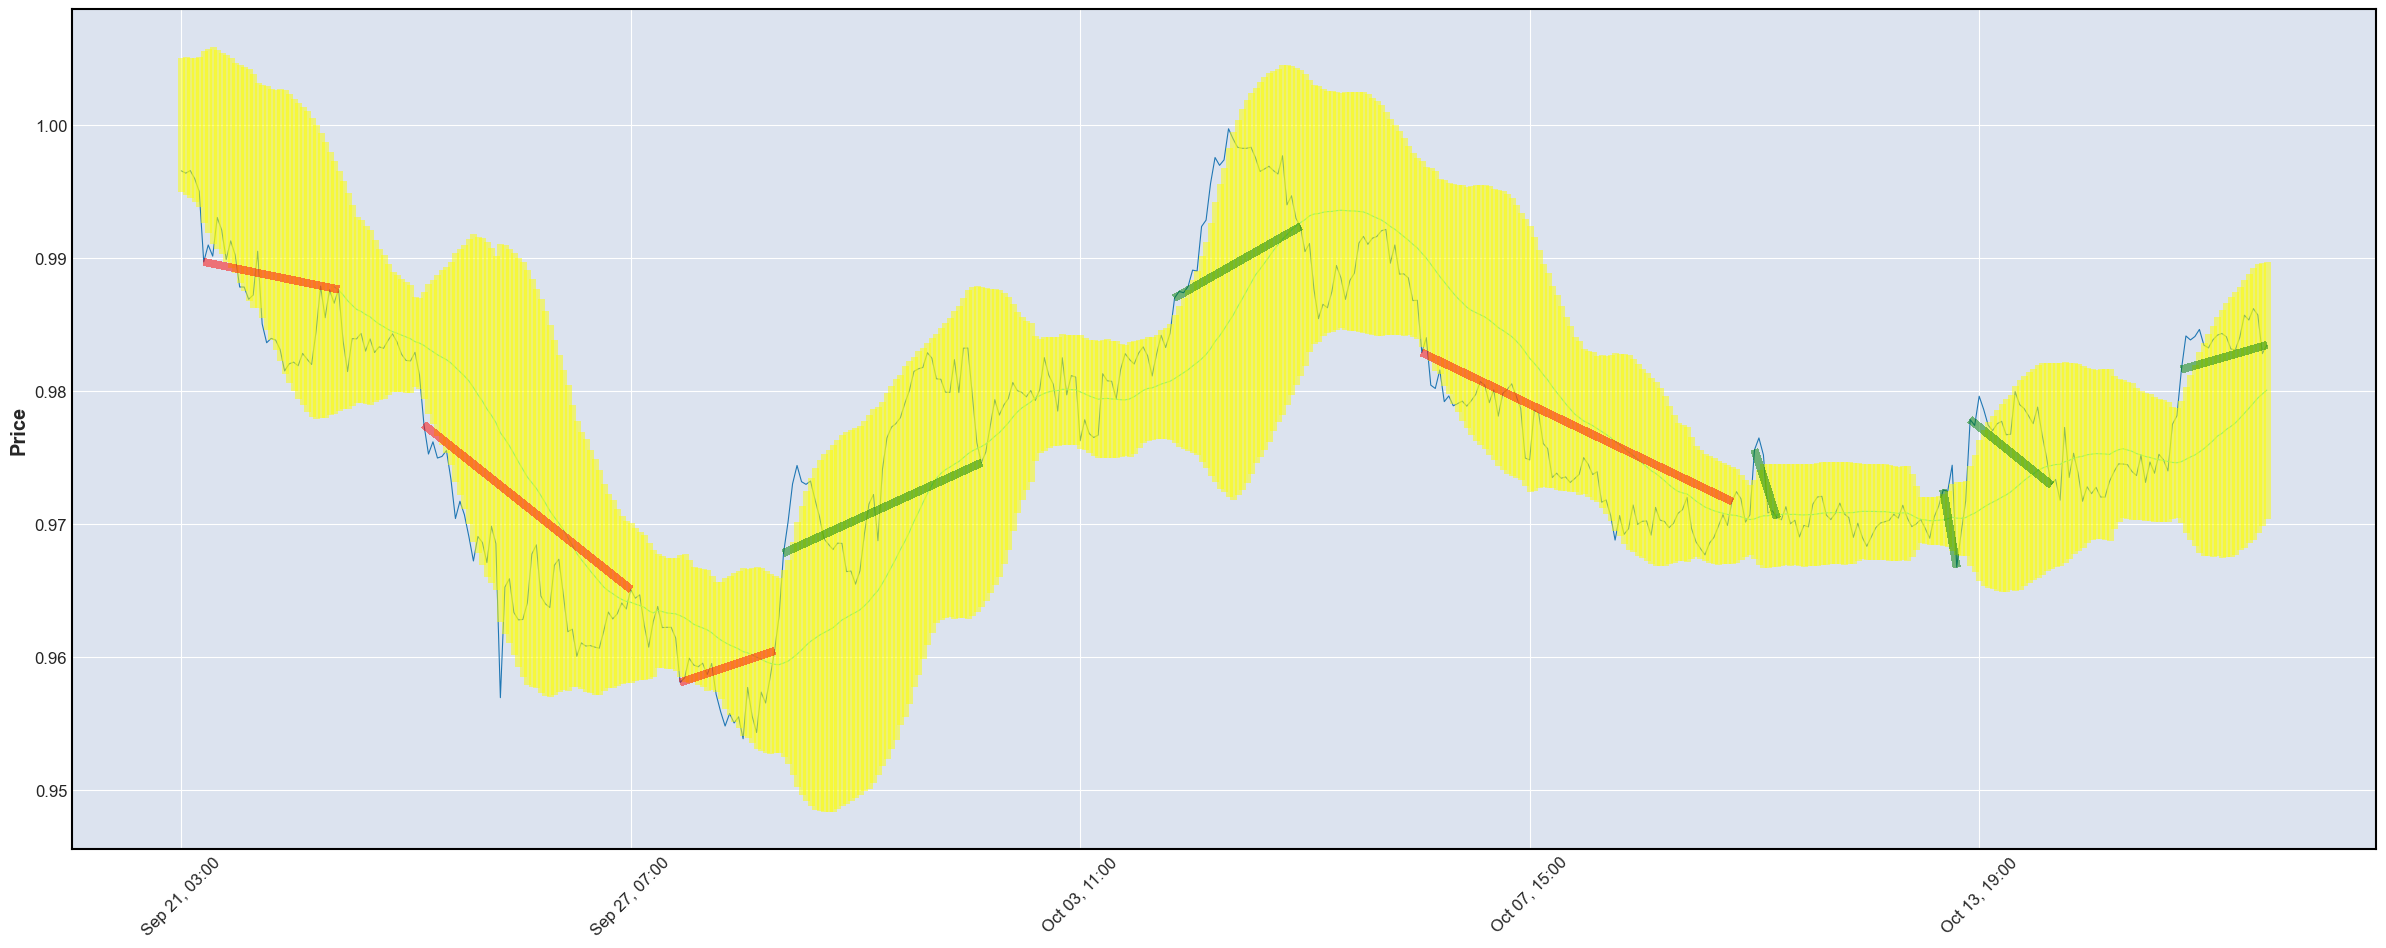

In [9]:
# check uscita dalle bande di Bollinger come segnale di inversione di trend

connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H1, 0, 500))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

window = 35
candles = get_bbands(candles, window=window)
candles = candles[window:]

i = 1
wallet = 0
played = 0
wins = 0
buy_candles = []
sell_candles = []

while i < len(candles):
    prev = candles.iloc[i - 1]
    act = candles.iloc[i]

    if prev.close > prev.bb_lower and act.close < act.bb_lower:
        sell_price = act.close
        o = i + 1
        c = candles.iloc[o]
        ts_buy = c.name
        buy_price = c.close
        result = sell_price - buy_price
        while buy_price < c['mean'] and o < (len(candles) - 1):
            o += 1
            c = candles.iloc[o]
            ts_buy = c.name
            buy_price = c.close
            result = sell_price - buy_price
        i = o
        if result > 0:
            wins += 1
        wallet += result
        played += 1
        print(act.name, 'sell:', sell_price, ' -- ', ts_buy, 'buy:', buy_price, ' -> ', result)
        sell_candles.append([act.name, sell_price, ts_buy, buy_price])
    if prev.close < prev.bb_upper and act.close > act.bb_upper:
        buy_price = act.close
        o = i + 1
        c = candles.iloc[o]
        sell_price = c.close
        result = sell_price - buy_price
        ts_sell = c.name
        while sell_price > c['mean'] and o < (len(candles) - 1):
            o += 1
            c = candles.iloc[o]
            ts_sell = c.name
            sell_price = c.close
            result = sell_price - buy_price
        i = o
        if result > 0:
            wins += 1
        wallet += result
        played += 1
        print(act.name, 'buy:', buy_price, ' -- ', ts_sell, 'sell:', sell_price, ' -> ', result)
        buy_candles.append([act.name, buy_price, ts_sell, sell_price])
    i += 1

print('\nwallet:', wallet)
print('vinte', wins, 'su', played)

lines = []
colors = []
for c in candles.iterrows():
    lines.append([(c[0], c[1].bb_upper), (c[0], c[1].bb_lower)])
    colors.append('yellow')

for s in sell_candles:
    lines.append([(s[0], s[1]), (s[2], s[3])])
for _ in sell_candles:
    colors.append('r')

for b in buy_candles:
    lines.append([(b[0], b[1]), (b[2], b[3])])
for _ in buy_candles:
    colors.append('g')

mpf.plot(candles, alines=dict(alines=lines, colors=colors, linewidths=5, alpha=0.5), mav=window, figsize=(32, 12), type='line')

Pattern della prossima strategia:    
    
<img src='images/bbands_pattern.png'/>
    
check ultime 3 candele rispetto alle bande di Bollinger per generare segnali di buy e sell    
verifica che low, close e high delle ultime 3 candele siano sopra o sotto le bande di Bollinger    


wallet: 0.019750000000000156
vinte 2 su 3


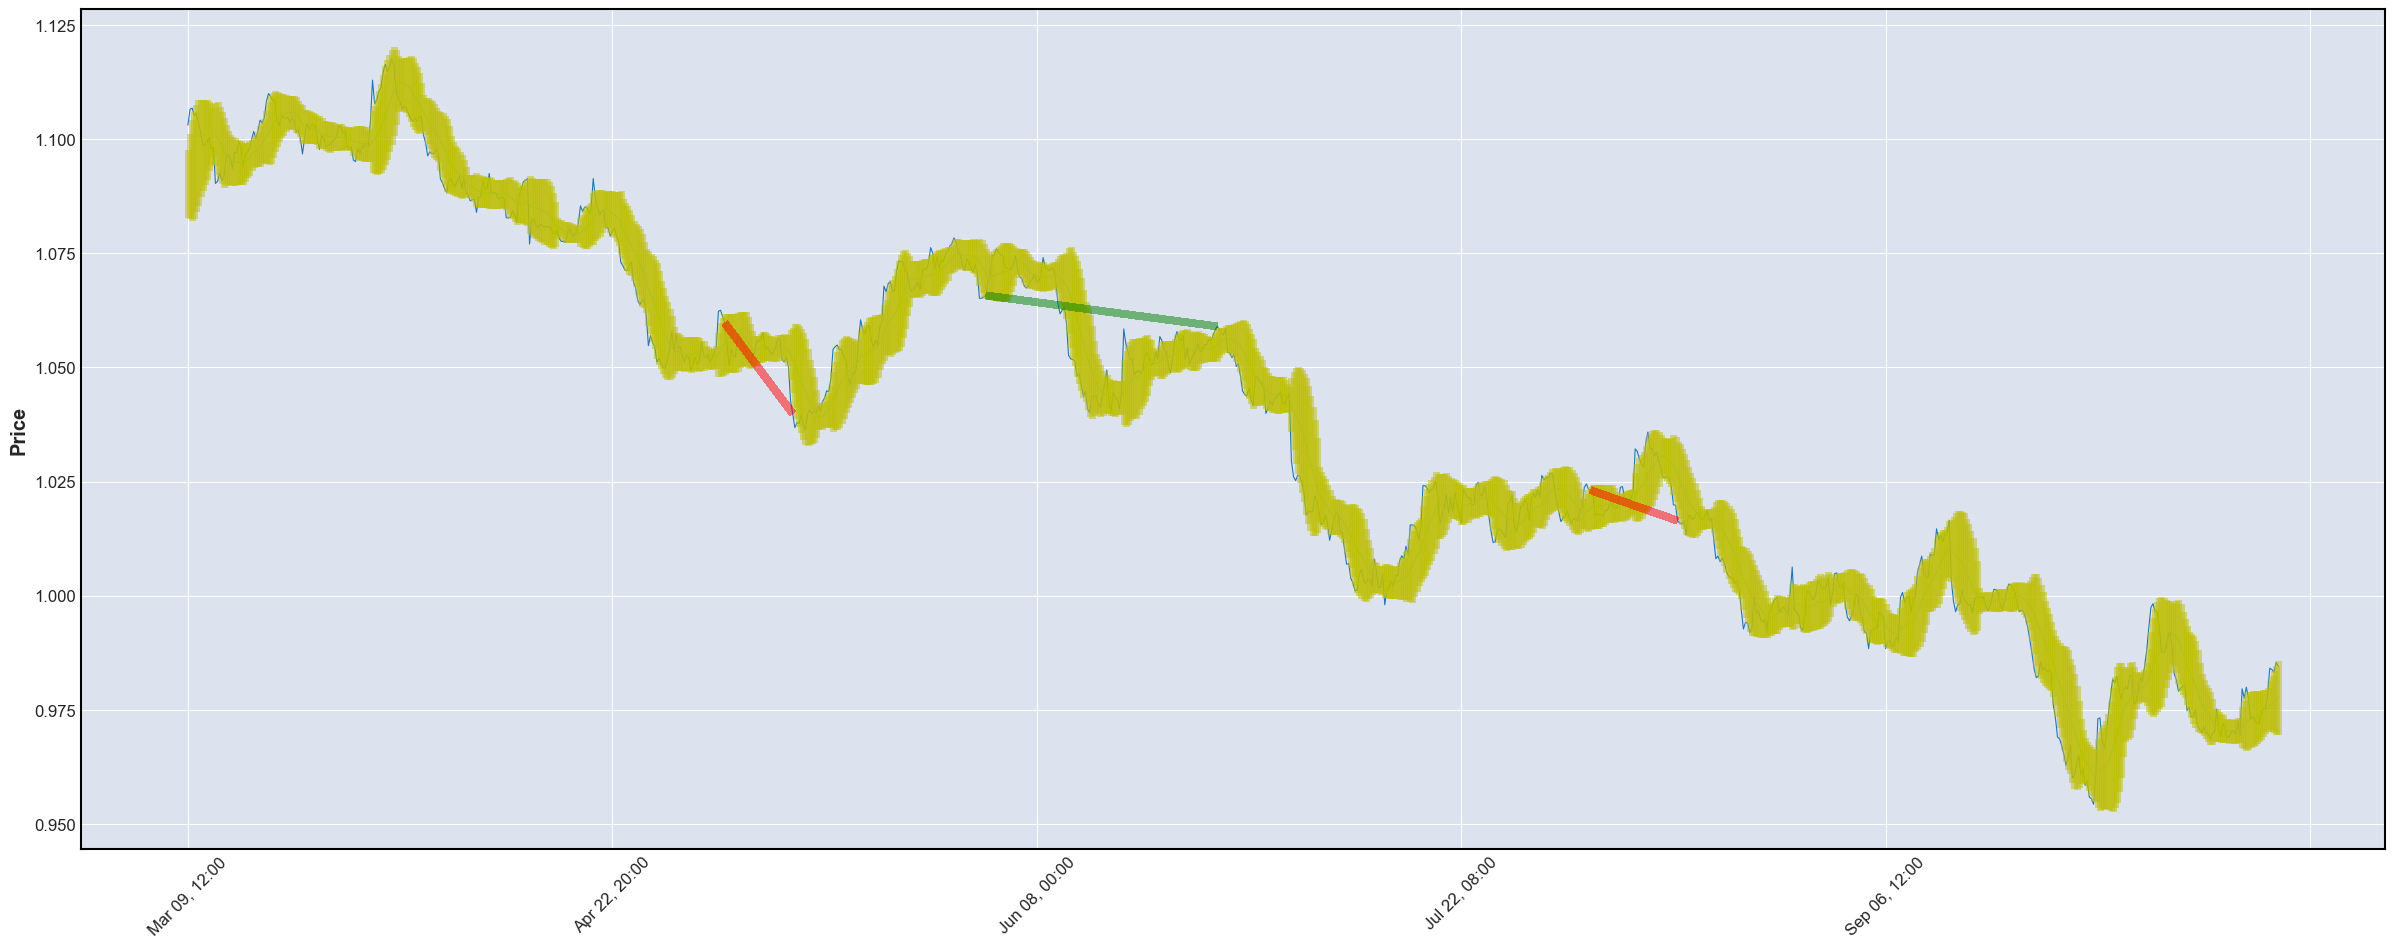

In [10]:
connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H4, 0, 1000))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

window = 14

def get_bbands(candles, window=14):
    candles = candles.copy()
    candles['mean'] = candles['close'].rolling(window=window).mean()
    candles['std'] = candles['close'].rolling(window=window).std()
    candles['bb_upper'] = candles['mean'] + candles['std'] * 1.5
    candles['bb_lower'] = candles['mean'] - candles['std'] * 1.5
    return candles

candles = get_bbands(candles, window=window)
candles = candles[window:]

i = 2
wallet = 0
played = 0
wins = 0
buy_candles = []
sell_candles = []
in_sell = False
in_buy = False

while i < len(candles):
    c = candles.iloc[i]
    c_1 = candles.iloc[i - 1]
    c_2 = candles.iloc[i - 2]

    if in_buy:
        if c.close > c['bb_upper'] and c_1.close > c_1['bb_upper'] and c_2.close > c_2['bb_upper']:
            in_buy = False
            buy_end_ts = c.name
            buy_buy_price = c.close
            buy_candles.append([buy_start_ts, buy_sell_price, buy_end_ts, buy_buy_price])
            played += 1
            if buy_sell_price < buy_buy_price:
                wins += 1
            wallet += buy_buy_price - buy_sell_price
    elif c_2.bb_lower > c_2.high and c_1.bb_lower > c_1.close and c.bb_lower > c.low and \
            c_2.close < c_1.close < c.close and \
            not in_sell:
        in_buy = True
        buy_start_ts = c.name
        buy_sell_price = c.close

    if in_sell:
        if c.close < c['bb_lower'] and c_1.close < c_1['bb_lower'] and c_2.close < c_2['bb_lower']:
            in_sell = False
            sell_end_ts = c.name
            sell_sell_price = c.close
            sell_candles.append([sell_start_ts, sell_buy_price, sell_end_ts, sell_sell_price])
            played += 1
            if sell_sell_price < sell_buy_price:
                wins += 1
            wallet += sell_buy_price - sell_sell_price
    elif c_2.bb_upper < c_2.low and c_1.bb_upper < c_1.close and c.bb_upper < c.high and \
            c_2.close > c_1.close > c.close and \
            not in_buy:
        in_sell = True
        sell_start_ts = c.name
        sell_buy_price = c.close

    i += 1

print('\nwallet:', wallet)
print('vinte', wins, 'su', played)

lines = []
colors = []

for c in candles.iterrows():
    lines.append([(c[0], c[1].bb_upper), (c[0], c[1].bb_lower)])
    colors.append('y')

for b in buy_candles:
    lines.append([(b[0], b[1]), (b[2], b[3])])
for _ in buy_candles:
    colors.append('g')

for s in sell_candles:
    lines.append([(s[0], s[1]), (s[2], s[3])])
for _ in sell_candles:
    colors.append('r')

mpf.plot(candles, alines=dict(alines=lines, colors=colors, linewidths=5, alpha=0.5), mav=window, figsize=(32, 12), type='line')